In [1]:
# Import necessary libraries
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding

Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences= True))
model.add(SimpleRNN(32, return_sequences= True))
model.add(SimpleRNN(32, return_sequences= True))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


## Real work

In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
maxlen = 1500
batch_size = 32

print("Loading data....")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words= max_features)
print(len(input_train)," train sequences")
print(len(input_test)," test sequences")

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_train, maxlen = maxlen)
print('input_train shape :' , input_train.shape)
print('input_test shape :' , input_test.shape)

Loading data....
25000  train sequences
25000  test sequences
Pad sequences (samples x time)
input_train shape : (25000, 1500)
input_test shape : (25000, 1500)


In [5]:
from keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer ='rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(input_train, y_train,
                   epochs = 10, 
                    batch_size = 128,
                   validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.6492 - acc: 0.6053 - val_loss: 0.5159 - val_acc: 0.7752
Epoch 2/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.4275 - acc: 0.8173 - val_loss: 0.3744 - val_acc: 0.8486
Epoch 3/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.3083 - acc: 0.8757 - val_loss: 0.3681 - val_acc: 0.8514
Epoch 4/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.2573 - acc: 0.8993 - val_loss: 0.3700 - val_acc: 0.8472
Epoch 5/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.2130 - acc: 0.9185 - val_loss: 0.4132 - val_acc: 0.8328
Epoch 6/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.1478 - acc: 0.9481 - val_loss: 0.3988 - val_acc: 0.8452
Epoch 7/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.1250 - acc: 0.9562 - val_loss: 0.4230 - val_acc:

In [6]:
import matplotlib.pyplot as plt 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("fig1.jpg")
plt.show()

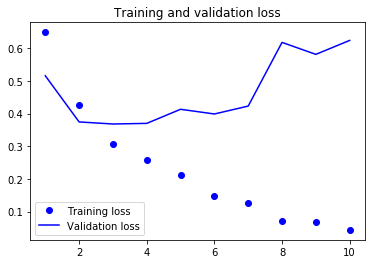

In [7]:
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("fig2.jpg")
plt.show()